############### 게임 매상 감소 원인 분석 ###############
 
 
 1단계 : CSV 파일을 읽어들이기
 2단계 :DAU 데이터에 Install 데이터를 결합시키기 
 3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기  
 4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서  넣기  
 5단계 : 월차 집계를 위한 월 항목 컬럼 추가    
 6단계 :추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)   
 7단계 :신규 유저인지 기존 유저인지 구분하는 항목의 새 컬럼변수 추가
 8단계 :로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
 9단계 : 그래프로 데이터 시각화 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import warnings 

warnings.filterwarnings("ignore")

# 1단계 : CSV 파일을 읽어들이기
df_dau = pd.read_csv("dau.csv")
df_install = pd.read_csv("install.csv")
df_dpu = pd.read_csv("dpu.csv")


# 2단계 :DAU 데이터에 Install 데이터를 결합시키기
merge_stage1 = pd.merge(df_install, df_dau)
merge_stage1.sort_values(by=['user_id'], axis=0)
#merge_stage1.to_csv("merge_stage1.csv", mode='w')


# 3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기
merge_stage2 = pd.merge(merge_stage1, df_dpu, how='outer')
merge_stage2.sort_values(by=['user_id'], axis=0)
#merge_stage2.to_csv("merge_stage2.csv", mode='w')
game_data = merge_stage2
game_data = game_data[['user_id', 'app_name', 'install_date', 'log_date', 'payment']]
#display(game_data.isnull().sum())


# 4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서 넣기
game_data.fillna({'payment':0}, inplace=True)
#game_data.to_csv("merge_stage4.csv", mode='w')
game_data.head()


# 5단계 : 월차 집계를 위한 월 항목 컬럼 추가 
### 가입일 데이터 기준 월 추가
game_data['install_Data'] = pd.to_datetime(game_data['install_date'])
game_data['install_month'] = game_data['install_Data'].dt.month
game_data.drop('install_Data', axis=1, inplace=True)

### 과금일 데이터 기준 월 추가
game_data['log_Data'] = pd.to_datetime(game_data['log_date'])
game_data['log_month'] = game_data['log_Data'].dt.to_period(freq='M')
game_data.drop('log_Data', axis=1, inplace=True)
#game_data.to_csv("merge_stage5.csv", mode='w')

# 6단계 : 추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)
total_payment = game_data.groupby('log_month').sum()


# 7단계 :신규 유저인지 기존 유저인지 구분하는 항목의 새 컬럼변수 추가
def user_seperate(df):
    if df['log_month'] == "2013-07":
        return '신규'
    elif df['log_month'] == "2013-06":
        return '기존'

game_data['log_month'] = game_data['log_month'].astype(str)   
game_data['user_seperate'] = game_data.apply(user_seperate, axis=1)


# 8단계 : 로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
total_payment = game_data.groupby(['log_month', 'user_seperate']).sum()
total_payment
display(total_payment)


#  9단계 : 그래프로 데이터 시각화 
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path='malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)



,,user_id,payment,install_month
log_month,user_seperate,,,
2013-06,기존,912134079,2277230.0,400634
2013-07,신규,1100188219,2070850.0,375397


FileNotFoundError: [Errno 2] No such file or directory: 'malgun.ttf'

In [163]:
label = game_data['payment'].unique()
index = game_data['payment'].count()

139295

,user_id,app_name,install_date,log_date,payment,install_month,log_month,user_seperate
0,1,game-01,2013-04-15,2013-06-01,0.0,2013-04,2013-06,기존
1,1,game-01,2013-04-15,2013-06-02,0.0,2013-04,2013-06,기존
2,1,game-01,2013-04-15,2013-06-03,0.0,2013-04,2013-06,기존
3,1,game-01,2013-04-15,2013-06-04,0.0,2013-04,2013-06,기존
4,1,game-01,2013-04-15,2013-06-05,0.0,2013-04,2013-06,기존


,log_month,user_seperate,payment
0,2013-06,기존,2277230.0
1,2013-07,기존,1778860.0
2,2013-07,신규,291990.0


([<matplotlib.axis.XTick at 0x25de9e7b2c8>,
 <a list of 2 Text xticklabel objects>)

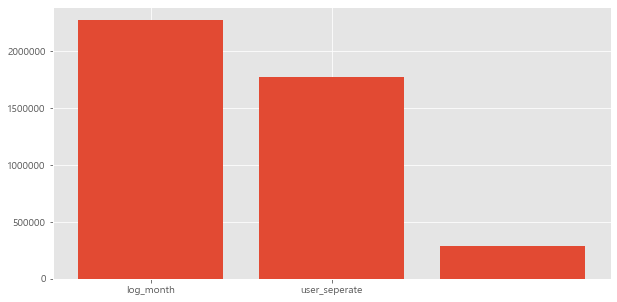

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# 1단계 : CSV 파일을 읽어들이기
df_dau = pd.read_csv("dau.csv")
df_install = pd.read_csv("install.csv")
df_dpu = pd.read_csv("dpu.csv")


# 2단계 :DAU 데이터에 Install 데이터를 결합시키기
merge_stage1 = pd.merge(df_install, df_dau)
merge_stage1.sort_values(by=['user_id'], axis=0)


# 3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기
merge_stage2 = pd.merge(merge_stage1, df_dpu, how='outer')
merge_stage2.sort_values(by=['user_id'], axis=0)
game_data = merge_stage2
game_data = game_data[['user_id', 'app_name', 'install_date', 'log_date', 'payment']]


# 4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서 넣기
game_data.fillna({'payment':0}, inplace=True)
game_data.head()


# 5단계 : 월차 집계를 위한 월 항목 컬럼 추가
### 가입일 데이터 기준 월 추가
game_data['install_Data'] = pd.to_datetime(game_data['install_date'])
game_data['install_month'] = game_data['install_Data'].dt.to_period(freq='M')
game_data.drop('install_Data', axis=1, inplace=True)

### 과금일 데이터 기준 월 추가
game_data['log_Data'] = pd.to_datetime(game_data['log_date'])
game_data['log_month'] = game_data['log_Data'].dt.to_period(freq='M')
game_data.drop('log_Data', axis=1, inplace=True)


# 6단계 : 추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)
total_payment = game_data.groupby('log_month').sum()


# 7단계 :신규 유저인지 기존 유b저인지 구분하는 항목의 새 컬럼변수 추가
def user_seperate(df):
   if df['log_month'] == "2013-07" and df['install_month'] == "2013-07":
       return '신규'
   else:
       return '기존'

game_data['install_month'] = game_data['install_month'].astype(str)      
game_data['log_month'] = game_data['log_month'].astype(str)  
game_data['user_seperate'] = game_data.apply(user_seperate, axis=1)
display(game_data.head())

# 8단계 : 로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
total_payment = game_data.groupby(['log_month', 'user_seperate']).sum()
total_payment.drop('user_id', axis=1, inplace=True)
total_payment.reset_index(inplace=True)
display(total_payment)

#  9단계 : 그래프로 데이터 시각화 (미완성, 20일 내 완료예정)
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path='malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# 스타일 서식 지정
#plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

x = list(total_payment.columns)
y = total_payment['payment']
pos = np.arange(2)
rects = plt.bar(x, y)
plt.xticks(pos, x)


In [ ]:
## plot 공부
industry = ['통신업', '의료정밀']
fluc =[1.83, 1.30]
ypos = np.arange(2)
rects = plt.bar(ypos, fluc)
plt.xticks(ypos, industry)


# https://wikidocs.net/4767

,user_id,app_name,install_date,log_date,payment,install_month,log_month,user_seperate
0,1,game-01,2013-04-15,2013-06-01,0.0,2013-04,2013-06,기존
1,1,game-01,2013-04-15,2013-06-02,0.0,2013-04,2013-06,기존
2,1,game-01,2013-04-15,2013-06-03,0.0,2013-04,2013-06,기존
3,1,game-01,2013-04-15,2013-06-04,0.0,2013-04,2013-06,기존
4,1,game-01,2013-04-15,2013-06-05,0.0,2013-04,2013-06,기존


payment
log_month user_seperate           
2013-06   기존             2277230.0
2013-07   기존             1778860.0
          신규              291990.0

payment          
user_seperate         기존        신규
log_month                         
2013-06        2277230.0       NaN
2013-07        1778860.0  291990.0

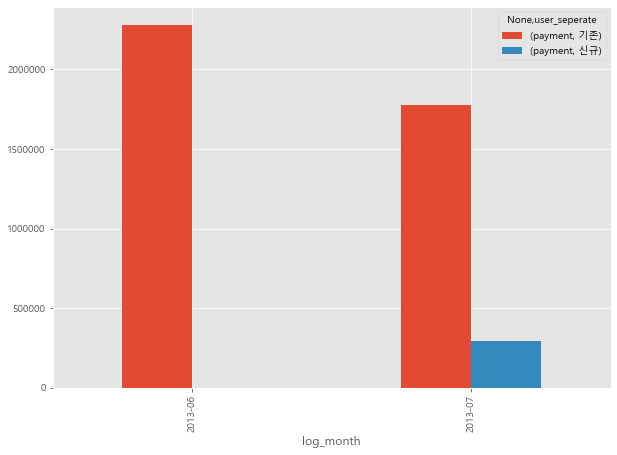

In [6]:
#####최서환#########################################################
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

# 1단계 : CSV 파일을 읽어들이기
df_dau = pd.read_csv("dau.csv")
df_install = pd.read_csv("install.csv")
df_dpu = pd.read_csv("dpu.csv")


# 2단계 :DAU 데이터에 Install 데이터를 결합시키기
merge_stage1 = pd.merge(df_install, df_dau)
merge_stage1.sort_values(by=['user_id'], axis=0)


# 3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기
merge_stage2 = pd.merge(merge_stage1, df_dpu, how='outer')
merge_stage2.sort_values(by=['user_id'], axis=0)
game_data = merge_stage2
game_data = game_data[['user_id', 'app_name', 'install_date', 'log_date', 'payment']]


# 4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서 넣기
game_data.fillna({'payment':0}, inplace=True)
game_data.head()


# 5단계 : 월차 집계를 위한 월 항목 컬럼 추가
### 가입일 데이터 기준 월 추가
game_data['install_Data'] = pd.to_datetime(game_data['install_date'])
game_data['install_month'] = game_data['install_Data'].dt.to_period(freq='M')
game_data.drop('install_Data', axis=1, inplace=True)

### 과금일 데이터 기준 월 추가
game_data['log_Data'] = pd.to_datetime(game_data['log_date'])
game_data['log_month'] = game_data['log_Data'].dt.to_period(freq='M')
game_data.drop('log_Data', axis=1, inplace=True)


# 6단계 : 추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)
total_payment = game_data.groupby('log_month').sum()


# 7단계 :신규 유저인지 기존 유b저인지 구분하는 항목의 새 컬럼변수 추가
def user_seperate(df):
    if df['log_month'] == "2013-07" and df['install_month'] == "2013-07":
        return '신규'
    else:
        return '기존'

game_data['install_month'] = game_data['install_month'].astype(str)       
game_data['log_month'] = game_data['log_month'].astype(str)   
game_data['user_seperate'] = game_data.apply(user_seperate, axis=1)
display(game_data.head())

# 8단계 : 로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
total_payment = game_data.groupby(['log_month', 'user_seperate']).sum()
total_payment.drop('user_id', axis=1, inplace=True)
display(total_payment)
display(total_payment.unstack())

#  9단계 : 그래프로 데이터 시각화 (미완성, 20일 내 완료예정)
#matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path='malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# 스타일 서식 지정

#그래프1(bar)
total_payment.unstack().plot(kind = 'bar', figsize = (10, 7))
plt.show()